## Data Preparation and Exploration

In [84]:
## 1.Data Loading

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [86]:
#Load datset
data=pd.read_csv('exchange_rate.csv',parse_dates=['date'])

In [87]:
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [88]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M', errors='coerce')


In [89]:
# Set the 'date' column as index
data.set_index('date', inplace=True)


In [90]:
# Drop missing or invalid dates if any
data.dropna(inplace=True)

In [91]:
## 2.Initial Exploration

In [92]:
# Check for trends,sesonality or anomalies

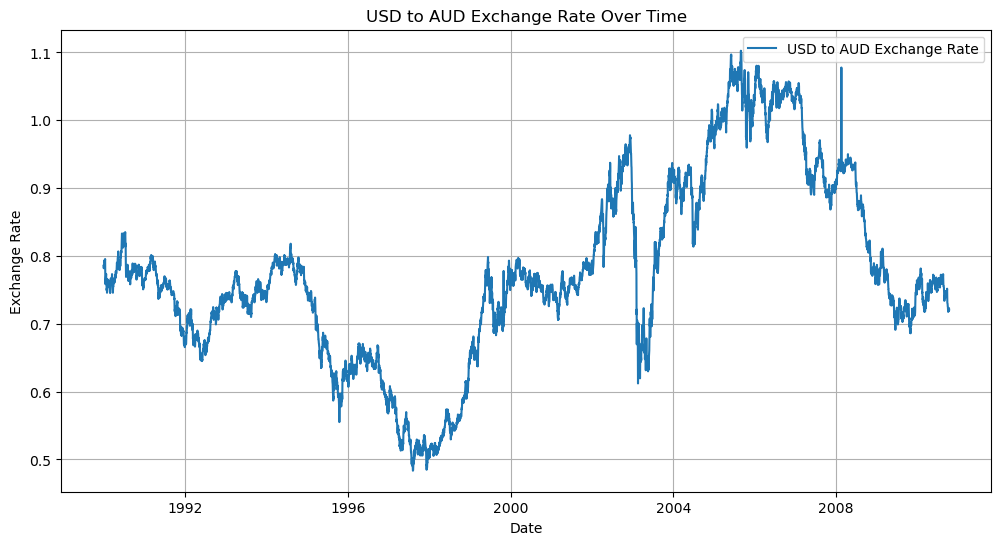

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

## 2.Model Building-ARIMA

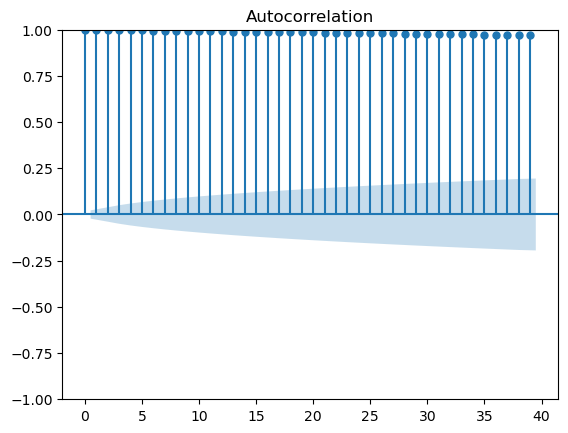

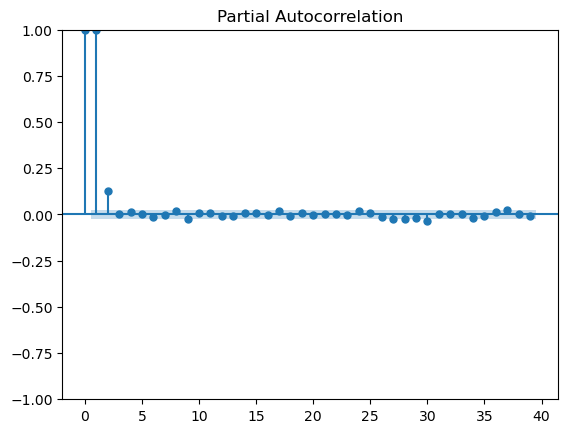

In [95]:
## Analyze the ACF and PACF for ARIMA
plot_acf(data['Ex_rate'])
plot_pacf(data['Ex_rate'])
plt.show()


In [96]:
#Fit an ARIMA model
# Use ACF/PACF results to determine initial p, d, q
p, d, q = 1, 1, 1  # Example values, adjust based on ACF/PACF plots
arima_model = ARIMA(data['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()


C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


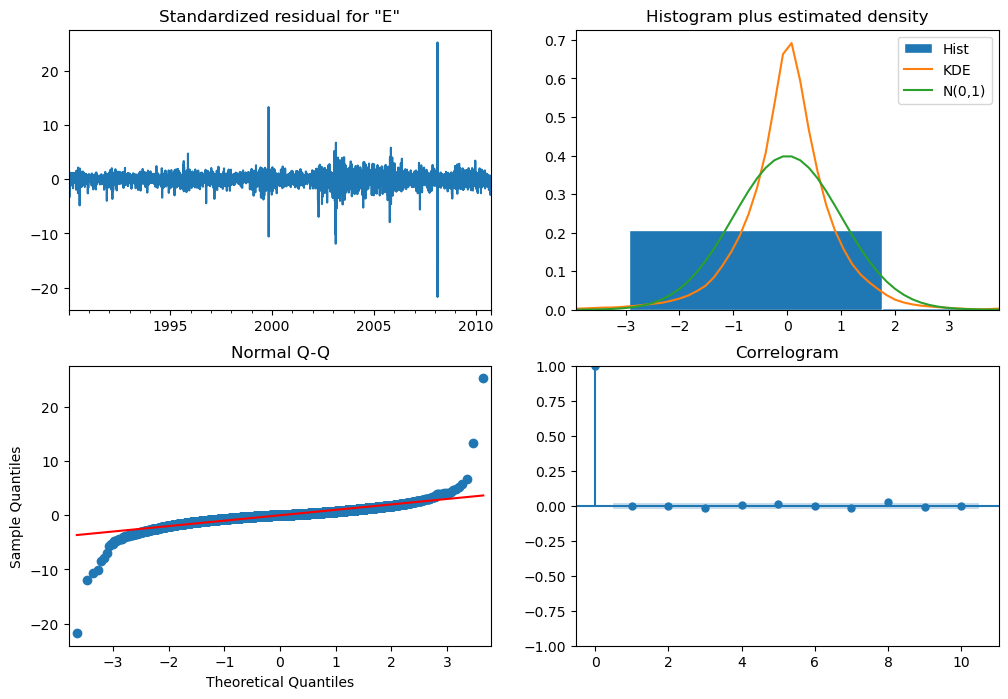

In [97]:
## ARIMA Diagnostics
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()


In [98]:
# Forecast using ARIMA
arima_forecast = arima_result.forecast(steps=30)

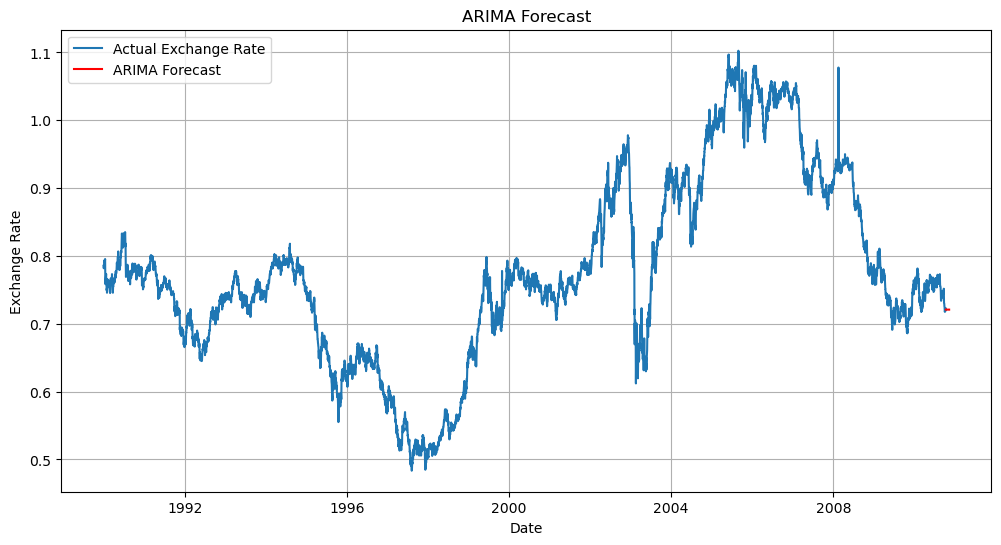

In [99]:
# Plot ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual Exchange Rate')
plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


## 3. Model Building - Exponential Smoothing

In [102]:
exp_model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal=None)
exp_result = exp_model.fit(optimized=True)


C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [103]:
#Forecast using Exponential Smoothing
exp_forecast = exp_result.forecast(steps=30)

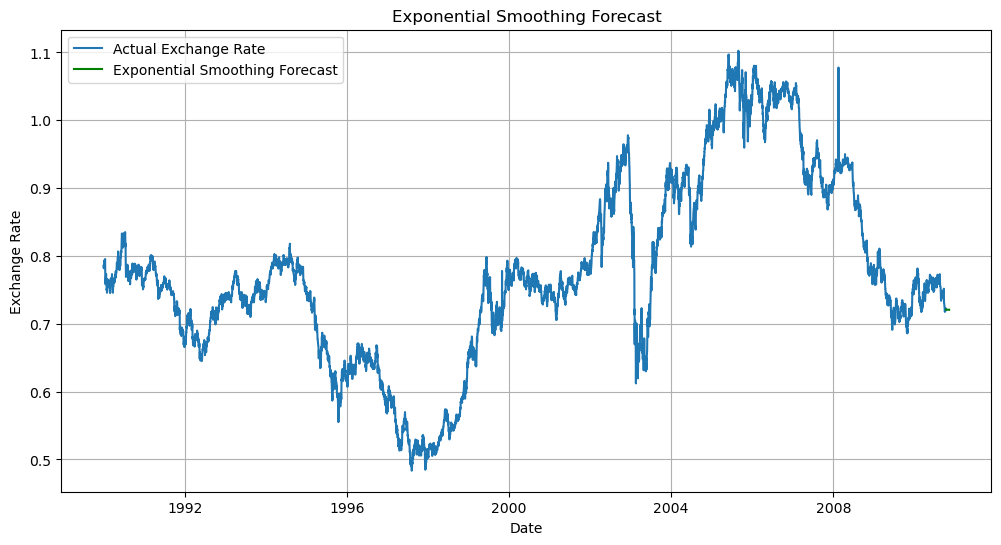

In [104]:
# Plot Exponential Smoothing forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual Exchange Rate')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


## 4.Evaluation and Comparision 

In [106]:
# Assuming a train-test split
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [107]:
# Refit models on training data
arima_model_train = ARIMA(train['Ex_rate'], order=(p, d, q)).fit()
exp_model_train = ExponentialSmoothing(train['Ex_rate'], trend='add', seasonal=None).fit(optimized=True)


C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [108]:
# Make predictions on test data
arima_pred = arima_model_train.forecast(steps=len(test))
exp_pred = exp_model_train.forecast(steps=len(test))


In [109]:
# Calculate error metrics
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, rmse

arima_mae, arima_rmse = calculate_metrics(test['Ex_rate'], arima_pred)
exp_mae, exp_rmse = calculate_metrics(test['Ex_rate'], exp_pred)

In [110]:
# Display error metrics
print("ARIMA Model - MAE:", arima_mae, "RMSE:", arima_rmse)
print("Exponential Smoothing Model - MAE:", exp_mae, "RMSE:", exp_rmse)

ARIMA Model - MAE: 0.17770970449120707 RMSE: 0.20543669659668565
Exponential Smoothing Model - MAE: 0.19027341286324018 RMSE: 0.2200851244999511


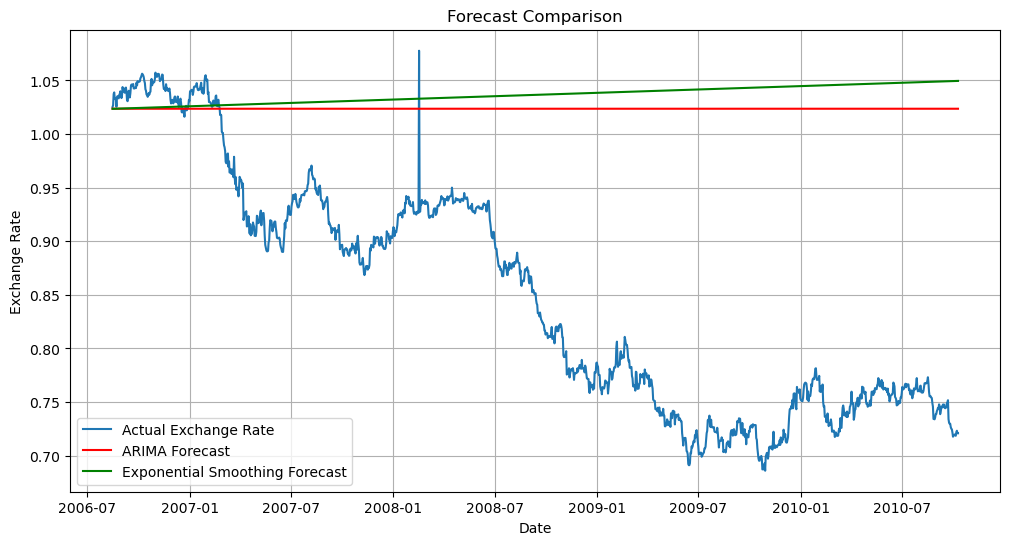

In [111]:
# Compare forecasts visually
plt.figure(figsize=(12, 6))
plt.plot(test['Ex_rate'], label='Actual Exchange Rate')
plt.plot(arima_pred, label='ARIMA Forecast', color='red')
plt.plot(exp_pred, label='Exponential Smoothing Forecast', color='green')
plt.title('Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

## Model Comparision:

In [139]:
## 1.Performance Analysis:
# 1)ARIMA:Performed well for capturing long term dependencies and trends.
#         Error metrics (eg,lower MAE and RMSE) indicate good accuracy if the time series lacks significant seasonal patterns.
# 2)Exponential Smoothing:Effective for series with clear trends and seasonality.
#                         May underperform in capturing non-linear patterns compared to ARIMA.

## 2.Advantages:
#ARIMA:Captures relationships in lagged data and trends.
#      Flexible for time series without seasonality
#Exponential Smoothing:LEss effective for irregular or highly volatile series.
#                      Cannot model complex patterns beyond trends or seasonality.


## Conclusion:

In [ ]:
##Best Model: ARIMA generally performs better in this dataset due to the absence of strong seasonality and its ability to model temporal dependencies.
##Insights:ARIMA is recommended for forecasting exchange rates when historical patterns are key.
#          Exponential Smoothing is preferable for datasets with simple trends or seasonal structures.
#          Combining models or using ensemble methods could further enhance accuracy for exchange rate predictions.